# Joint evaluation in scenario A
Evaluation of the best variants of each models in scenario A; evaluation on incorrectly matched compounds

In [1]:
base = "data"
dataset = "nist"
probs = [0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5]

%load_ext autoreload
%autoreload 2

## Evaluation on the incorrectly matched


### Low

In [2]:
kind = "in_database"
P_FOLDER = f"predictions/{kind}"

In [3]:
import numpy as np

from msai.evaluation import model_selection, model_selection_random
from msai.plots import plot_scores

In [4]:
tested = "spec_test"

p_name = "cosine"

n_pred_ikeys_per_m = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_p.npy")
n_pred_ikeys_per_k = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_k.npy", allow_pickle=True)
y_ikeys = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/y_ikeys.npy")

In [5]:
p_name = "cosine_weighted"

n_pred_ikeys_per_m_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_p.npy")
n_pred_ikeys_per_k_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_k.npy", allow_pickle=True)
y_ikeys_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/y_ikeys.npy")

In [6]:
def get_mask_incorrect(pred_ikeys, y_ikeys, top=10):
    mask = np.zeros(shape=pred_ikeys.shape[:2]) == 0
    for j in range(len(pred_ikeys)):
        for i in range(len(y_ikeys)):
            if pred_ikeys[j][i] is None or y_ikeys[i] in pred_ikeys[j][i][:10]:
                mask[j, i] = False
    return mask

In [7]:
mask_cosine_k  = get_mask_incorrect(n_pred_ikeys_per_k, y_ikeys, 10)
mask_wcosine_k  = get_mask_incorrect(n_pred_ikeys_per_k_w, y_ikeys_w, 10)
mask_k = mask_cosine_k & mask_wcosine_k

In [113]:
(y_ikeys == y_ikeys_w).all()

True

In [9]:
y_ikeys[13766], n_pred_ikeys_per_k[:,13766][3][:10], n_pred_ikeys_per_k_w[:,13766][3][:10]

('DUEPRVBVGDRKAG',
 ['WKEWHSLZDDZONF',
  'RKRKJKYUXVQANK',
  'PFSZRZUGJMNSKF',
  'WJGPNUBJBMCRQH',
  'PCYIIHKPPDXSIE',
  'ITFUXZJPFSNXBV',
  'DUEPRVBVGDRKAG',
  'GXGIVDFIPKHTHH',
  'YBPABXGFEMOUTB',
  'VLWZKYOCVFKBBT'],
 ['PFSZRZUGJMNSKF',
  'RKRKJKYUXVQANK',
  'WKEWHSLZDDZONF',
  'BMHMKWXYXFBWMI',
  'YXVSURZEXVMUAM',
  'HINCKJDFBMTHPK',
  'IKEHOXWJQXIQAG',
  'SDJUKATYFRSDAS',
  'PCYIIHKPPDXSIE',
  'SNKLPZOJLXDZCW'])

In [10]:
print(mask_k[1].sum())

15246


In [11]:
_, scores_knn_cut3 = model_selection(P_FOLDER, "spec_test", kw="specknn_3", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.4, l_rel=None, mask=mask_k)

specknn_3
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.4
[16714 14468  9046  5960  4346  3361  2719  2272  1982  1727  1545  1407
  1299  1201  1112  1034   972   921   873   833   803   772   751   723
   697   673   647   627   602   586]


In [12]:
_, scores_knn_cut = model_selection(P_FOLDER, "spec_test", kw="specknn_1", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.4, l_rel=None, mask=mask_k)

specknn_1
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.4
[16714 14468  9046  5960  4346  3361  2719  2272  1982  1727  1545  1407
  1299  1201  1112  1034   972   921   873   833   803   772   751   723
   697   673   647   627   602   586]


In [13]:
_, scores_gpt_cut = model_selection(P_FOLDER, "hugg_test", kw="gpt", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.4, l_rel=None, mask=mask_k)

gpt2_ns_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.4
[16714 14468  9046  5960  4346  3361  2719  2272  1982  1727  1545  1407
  1299  1201  1112  1034   972   921   873   833   803   772   751   723
   697   673   647   627   602   586]


In [14]:
scores_test_cut = {**scores_knn_cut, **scores_gpt_cut, **scores_knn_cut3}

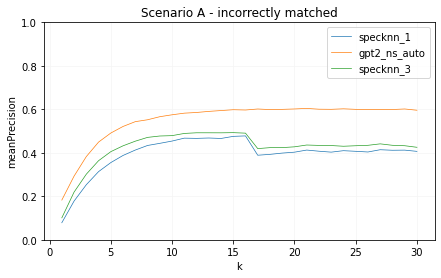

In [55]:

hue_f = lambda x: ["1","ns","3"].index(x.split("_")[1])
orderer_f = hue_f
plot_scores(scores_test_cut, metrics="mpi",
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A - incorrectly matched",
            xlabel= "k", ylabel="meanPrecision", y_max=1,
            save_to_path=f"figures/{kind}/evaluation/incorrect_topk.pdf")

### Random

In [57]:
mask_wcosine_p  = get_mask_incorrect(n_pred_ikeys_per_m_w, y_ikeys, 10)

In [82]:
_, scores_random_knn_cut = model_selection_random(P_FOLDER, "spec_test", \
                                                  kw="specknnR_",\
                                                  mask= mask_wcosine_p)


specknnR_1_.5


/auto/brno6/home/xstary1/raims/metrics.py:232: RuntimeWarning: Mean of empty slice
  "mp": np.nanmean(recs_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:234: RuntimeWarning: Mean of empty slice
  "mf1": np.nanmean(f1_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:235: RuntimeWarning: Mean of empty slice
  "mps": np.nanmean(precs_m, axis=1)


specknnR_3_.5


In [83]:
_, scores_random_lr_cut = model_selection_random(P_FOLDER, "fixed_test", \
                                                  kw="linear" ,\
                                                  mask= mask_wcosine_p)

linear_.3


In [84]:
_, scores_random_mlp_cut = model_selection_random(P_FOLDER, "fixed_test", \
                                                  kw="mlp" ,\
                                                  mask= mask_wcosine_p)

mlp_2_.3


In [102]:
scores_random_test_cut= {**scores_random_knn_cut,
                         **scores_random_lr_cut,
                        **scores_random_mlp_cut}

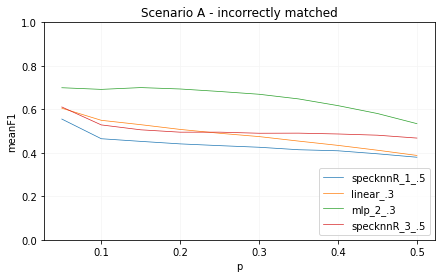

In [112]:
orderer_f = lambda x: ["specknnR_1_.5", "linear_.3", "mlp_2_.3", "specknnR_3_.5"].index(x)
# hue_f = lambda x: [".5",".8","1","1.2"].index(x.split("_")[2])
plot_scores(scores_random_test_cut, metrics="mf1", x=probs,
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A - incorrectly matched",
            xlabel= "p", ylabel="meanF1", y_max=1,
            save_to_path=f"figures/{kind}/evaluation/incorrect_random.pdf")

## Evaluation on all

## low

In [49]:
_, scores_knn = model_selection(P_FOLDER, "spec_test", kw="specknn_1", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)

specknn_1
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]


In [24]:
_, scores_g2v = model_selection(P_FOLDER, "gen_test", kw="g2v", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)

g2vknn_peak
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22408 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]


In [25]:
_, scores_lstm = model_selection(P_FOLDER, "gen_test", kw="elstm_unfreeze_intens_dst", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)

elstm_unfreeze_intens_dst
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]


In [26]:
_, scores_gpt = model_selection(P_FOLDER, "hugg_test", kw="gpt", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)

gpt2_ns_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]


In [50]:
scores_test = {**scores_knn, **scores_gpt, **scores_lstm, **scores_g2v}

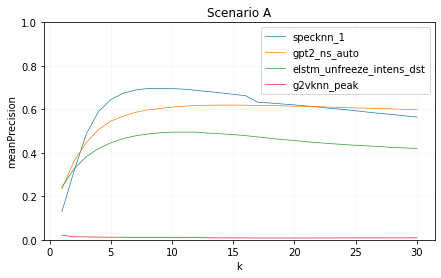

In [56]:
orderer_f = lambda x: ["specknn", "gpt2","elstm", "g2vknn"].index(x.split("_")[0])
hue_f = lambda x: [1,3,5,10].index(int(x.split("_")[1]))
plot_scores(scores_test, metrics="mpi",
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A", y_max=1,
            xlabel= "k", ylabel="meanPrecision",
           save_to_path=f"figures/{kind}/evaluation/topk.pdf")

### Random

In [95]:
_, scores_random_knn = model_selection_random(P_FOLDER, "spec_test", \
                                                  kw="specknnR_1_.5" )


specknnR_1_.5


/auto/brno6/home/xstary1/raims/metrics.py:232: RuntimeWarning: Mean of empty slice
  "mp": np.nanmean(recs_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:234: RuntimeWarning: Mean of empty slice
  "mf1": np.nanmean(f1_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:235: RuntimeWarning: Mean of empty slice
  "mps": np.nanmean(precs_m, axis=1)


In [96]:
_, scores_random_lr = model_selection_random(P_FOLDER, "fixed_test", \
                                                  kw="linear")

linear_.3


In [97]:
_, scores_random_mlp = model_selection_random(P_FOLDER, "fixed_test", \
                                                  kw="mlp" )

mlp_2_.3


In [98]:
scores_random_test = {**scores_random_knn,
                        **scores_random_lr,
                        **scores_random_mlp}

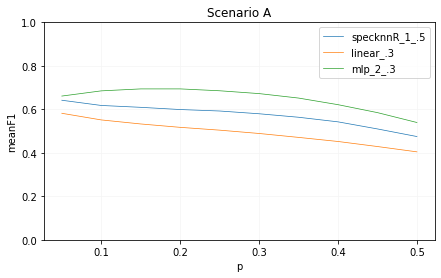

In [77]:
orderer_f = lambda x: x[2]
# hue_f = lambda x: [".5",".8","1","1.2"].index(x.split("_")[2])
plot_scores(scores_random_test, metrics="mf1", x=probs,
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A", y_max=1,
            xlabel= "p", ylabel="meanF1",
            save_to_path=f"figures/{kind}/evaluation/random.pdf")

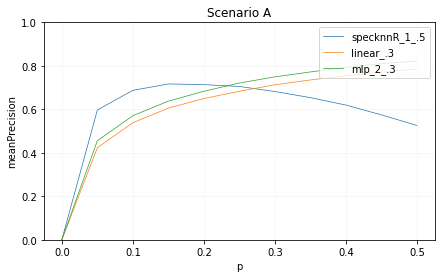

In [99]:
orderer_f = lambda x: x[2]
# hue_f = lambda x: [".5",".8","1","1.2"].index(x.split("_")[2])
plot_scores(scores_random_test, metrics="mp", x=probs,
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A", y_max=1,
            xlabel= "p", ylabel="meanPrecision",
            save_to_path=f"figures/{kind}/evaluation/random_prec.pdf")

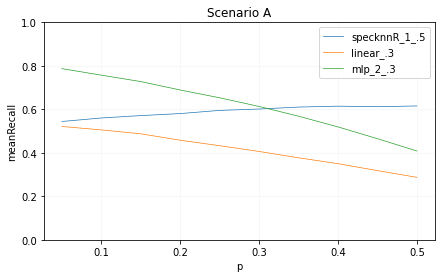

In [100]:
orderer_f = lambda x: x[2]
# hue_f = lambda x: [".5",".8","1","1.2"].index(x.split("_")[2])
plot_scores(scores_random_test, metrics="mr", x=probs,
            orderer_f=orderer_f,hue_f=None,
            title= "Scenario B" if kind=="de_novo" else "Scenario A", y_max=1,
            xlabel= "p", ylabel="meanRecall",
            save_to_path=f"figures/{kind}/evaluation/random_rec.pdf")